# Sprint6 決定木スクラッチ

In [601]:
class ScratchDecesionTreeClassifierDepth1():
    """
    深さ1の決定木分類器のスクラッチ実装
    Parameters
    ----------
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, verbose=False):
        # ハイパーパラメータを属性として記録
        self.verbose = verbose
        
        self.classes = None     # 分類クラス
        self.l_node = []        # 子ノード(左)
        self.r_node = []        # 子ノード(右)
        self.threshold = None   # 閾値
        self.best_gain = 0      # ベストな情報利得
        self.left_class = None  # 左ノードのクラス
        self.right_class = None # 右ノードのクラス
        
    
    # 問題3
    def fit(self, X, y):
        """
        決定木分類器を学習する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
        self.classes = set(y)  #分類クラス(0 or 1)

        # サンプルデータを生成：　Xとｙデータを結合したもの
        samples = np.c_[X, y]
        
        # 閾値をX1自体の値で全ての組み合わせを実施する
        for val in X[:, 1]:
            
            #初期化
            self.l_node = []
            self.r_node = []
            
            threshold = val

            for sample in samples:
                if sample[1] <= threshold:
                    self.l_node.append(sample)
                else:
                    self.r_node.append(sample)

            # どちらかのノードが空の場合は、ジニ係数の計算は不要なので、次の分割処理を行う
            if len(self.l_node) == 0 or len(self.r_node) == 0:
                continue

            l_gini = self._gini_impurity(np.array(self.l_node)[:, -1])
            r_gini = self._gini_impurity(np.array(self.r_node)[:, -1])
            gain = self._info_gain(np.array(self.l_node)[:, -1], np.array(self.r_node)[:, -1])

            # 情報利得を更新（値が大きいほうが良い）
            if gain > self.best_gain:
                self.best_gain = gain
                self.threshold = threshold
                
                #葉ノードのクラスを決める
                class1_cnt = np.sum(np.array(self.l_node)[:, -1] == list(self.classes)[0])
                class2_cnt = np.sum(np.array(self.l_node)[:, -1] == list(self.classes)[1])
                
                if class1_cnt >= class2_cnt:
                    self.left_class = list(self.classes)[0]
                    self.right_class = list(self.classes)[1]
                else:
                    self.left_class = list(self.classes)[1]
                    self.right_class = list(self.classes)[0]
                    
    
    # 問題4
    def predict(self, X):
        """
        決定木分類器を使いラベルを推定する
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            決定木（深さ＝１）分類器による推定結果
        """
        y_pred = X[:, 1]
        
        return np.where(y_pred <= self.threshold, self.left_class, self.right_class)
    
    
    #問題1
    def _gini_impurity(self, y):
        """
        ノードのジニ不純度を計算する
        Parameters
        ----------
        y : 次の形のndarray, shape (n_samples, n_features)
            ノード
        Returns
        -------
        gini： ジニ不純度  float
        """
        
        gini = 1
        for _class in self.classes:
            gini -= (len(y[y == _class]) / len(y))**2
            
        return gini
    
    
    #問題2
    def _info_gain(self, l_node, r_node):
        """
        ノード間の情報利得を計算する
        Parameters
        ----------
        l_node : 次の形のndarray, shape (n_samples, n_features)
            左のノード
        r_node : 次の形のndarray, shape (n_samples, n_features)
            右のノード
        Returns
        -------
        info_gain： 情報利得  float
        """
        
        p_node =  np.concatenate([l_node, r_node]) # 親ノード = leftノード　+ rightノード
        I_left = self._gini_impurity(l_node)
        I_right = self._gini_impurity(r_node)
        I_p = self._gini_impurity(p_node)
        
        info_gain = I_p - (len(l_node)/len(p_node))*I_left - (len(r_node)/len(p_node))*I_right
        
        return info_gain
    


## 【問題1】不純度を求める関数
---
ノード の ジニ不純度 を計算する関数を作成してください。ノード t
に対するジニ不純度 I(t)

は以下の数式で求まります。クラスが混じり合っているほどジニ不純度は高くなります。
$$
I(t)=1−\sum_{i=1}^{K}P^2(C_i|t)=1−\sum_{i=1}^{K}(\frac{N_{t,i}}{N_{t,all}})^2
$$

t: ノードのインデックス

i: クラスのインデックス

K: クラスの数

Ci: i番目のクラス

P(Ci|t):　t番目のノードにおけるCiの割合

Nt,i: t番目のノードのi番目のクラスに属するサンプル数

Nt,all: t番目のノードのサンプルの総数

まずは簡単な例を作り、手計算と関数の結果を比較してください。

《例》

-    クラス1:サンプル数15, クラス2:サンプル数15 → ジニ不純度0.500
-    クラス1:サンプル数15, クラス2:サンプル数15, クラス3:サンプル数15 → ジニ不純度0.667
-    クラス1:サンプル数18, クラス2:サンプル数12 → ジニ不純度0.480
-    クラス1:サンプル数30, クラス2:サンプル数0 → ジニ不純度0.000


## 【問題2】情報利得を求める関数
---
次に、ノード間の 情報利得 を計算する関数を作成してください。問題1で作成したジニ不純度 I(t)
を計算する関数を呼び出して使います。情報利得IG

は以下の数式で求まります。うまく分けられている時ほど情報利得は大きくなります。

ここで分岐は2つのみであるため、分岐先を「左側のノード・右側のノード」と呼びます。
$$
IG(p)=I(p)−\frac{N_{left,all}}{N_{p,all}}I(left)−\frac{N_{right,all}}{N_{p,all}}I(right)
$$
p: 親ノードを示すインデックス

left: 左側のノードを示すインデックス

right: 右側のノードを示すインデックス

まずは簡単な例を作り、手計算と関数の結果を比較してください。

《例》

左ノードクラス1:サンプル数10, 左ノードクラス2:サンプル数30, 右ノードクラス1:サンプル数20, 右ノードクラス2:サンプル数5 → 情報利得0.143

>## データセット

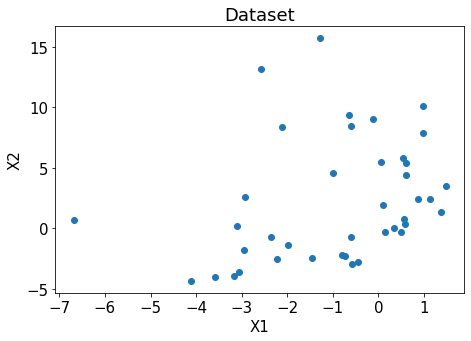

In [602]:
import numpy as np
X = np.array([
    [-0.44699 , -2.8073  ],[-1.4621  , -2.4586  ],
    [ 0.10645 ,  1.9242  ],[-3.5944  , -4.0112  ],
    [-0.9888  ,  4.5718  ],[-3.1625  , -3.9606  ],
    [ 0.56421 ,  0.72888 ],[-0.60216 ,  8.4636  ],
    [-0.61251 , -0.75345 ],[-0.73535 , -2.2718  ],
    [-0.80647 , -2.2135  ],[ 0.86291 ,  2.3946  ],
    [-3.1108  ,  0.15394 ],[-2.9362  ,  2.5462  ],
    [-0.57242 , -2.9915  ],[ 1.4771  ,  3.4896  ],
    [ 0.58619 ,  0.37158 ],[ 0.6017  ,  4.3439  ],
    [-2.1086  ,  8.3428  ],[-4.1013  , -4.353   ],
    [-1.9948  , -1.3927  ],[ 0.35084 , -0.031994],
    [ 0.96765 ,  7.8929  ],[-1.281   , 15.6824  ],
    [ 0.96765 , 10.083   ],[ 1.3763  ,  1.3347  ],
    [-2.234   , -2.5323  ],[-2.9452  , -1.8219  ],
    [ 0.14654 , -0.28733 ],[ 0.5461  ,  5.8245  ],
    [-0.65259 ,  9.3444  ],[ 0.59912 ,  5.3524  ],
    [ 0.50214 , -0.31818 ],[-3.0603  , -3.6461  ],
    [-6.6797  ,  0.67661 ],[-2.353   , -0.72261 ],
    [ 1.1319  ,  2.4023  ],[-0.12243 ,  9.0162  ],
    [-2.5677  , 13.1779  ],[ 0.057313,  5.4681  ],
])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])



import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['font.size'] = 15
fig = plt.figure(figsize=(7,5))

plt.title('Dataset')
plt.xlabel('X1')
plt.ylabel('X2')
plt.scatter(X[:,0], X[:, 1] )
# plt.scatter(X[250:,0], X[250:, 1] , label='1')

# plt.legend()
plt.tight_layout()
plt.show()


## 【問題3】学習
---
空間の分割を行い、決定木のグラフを生成するコードを作成してください。今は深さ1の決定木なので、分割を1回だけ行います。ここでグラフを生成するとは、1回の分割の際の条件としてどの特徴量がいくつ以上の時とするかを求めるということです。

訓練データに対してすべての組み合わせの分割を行い、その中でノード間の情報利得が最大となる分割をそのノードの分割基準として記録します。

クラスが混ざらない不純度が0のノード、または指定された深さのノードが 葉ノード となります。葉ノードにはクラスを記録しておき、これを推定時に分類するクラスとします。クラスが混ざらない場合はそのままのクラスを記録し、混ざっている場合は多数決により決めます。

**《組み合わせの取り方》**

すべての組み合わせの取り方は、最も単純には各特徴量の値自体をしきい値にして分割を行う方法があります。片側の端は今回のスクラッチはこの方法で行なってください。

他には中間の値をしきい値にする方法もあり、scikit-learnではこの方法が用いられています。

**《補足》**

問題2の情報利得を計算する関数はこの問題3で利用する上では、親ノードの不純度 I(p)
は固定されるため、左右のノードの不純度の合計を計算するだけでも同じ結果が得られることになります。しかし、ここでは親ノードを考慮した情報利得を計算する実装を行なってください。

## 【問題4】推定
---
推定する仕組みを実装してください。ScratchDecesionTreeClassifierDepth1クラスの雛形に含まれるpredictメソッドに書き加えてください。

入力されたデータの値を学習した条件で判定していき、どの葉ノードに到達するかを見ます。葉ノードにはクラスが記録されているので、これが推定値となります。

In [603]:
def evaluate_performance_model(y_test_data, y_pred_data):
    '''
    検証データと推定したデータからAccuracy, Percision, Recall, F1の指標を計算する関数
    Parameters:
    --------------
        y_test_data : ndarray型
        検証データ
        y_pred_data : ndarray型
        推定データ
    Returns:
    --------------
    None
    '''
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import confusion_matrix
    

    # 4種類の指標を計算する

    # Accuracy（正解率）
    print('Accuracy: \t%.2f' % accuracy_score(y_test_data, y_pred_data))

    # Precision（適合率）
    print('Precision: \t%.2f' % precision_score(y_test_data, y_pred_data))

    # Recall（再現率）
    print('Recall: \t%.2f' % recall_score(y_test_data, y_pred_data))

    # F値
    print('f1: \t\t%.2f' % f1_score(y_test_data, y_pred_data))
    
    # 混合行列
    print('Confusion matrix:\n{}'.format(confusion_matrix(y_test_data, y_pred_data)))

## 【問題5】学習と推定
---
機械学習スクラッチ入門のSprintで用意したシンプルデータセット2の2値分類に対してスクラッチ実装の学習と推定を行なってください。

scikit-learnによる実装と比べ、正しく動いているかを確認してください。

AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

>### Scratch実装コード

In [604]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 訓練データと検証データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# SVMスクラッチのインスタンス
num_iter = 500    # iterations
lr = 0.005   # learning rate

clf = ScratchDecesionTreeClassifierDepth1()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# 指標値
evaluate_performance_model(y_test, y_pred)


Accuracy: 	0.58
Precision: 	0.60
Recall: 	0.50
f1: 		0.55
Confusion matrix:
[[4 2]
 [3 3]]


>### scikit-learnによる実装

In [605]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(max_depth=1)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)

# 4種類の指標を表示
evaluate_performance_model(y_test, y_pred)

Accuracy: 	0.67
Precision: 	0.75
Recall: 	0.50
f1: 		0.60
Confusion matrix:
[[5 1]
 [3 3]]


## 【問題6】決定領域の可視化
---
決定領域を可視化してください。

In [606]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.01)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()


>### Scratch実装

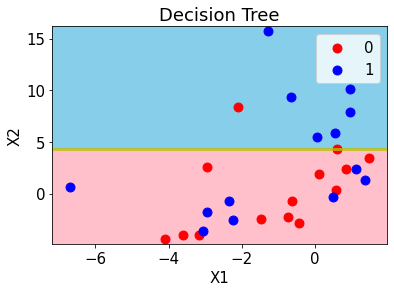

In [607]:
#可視化: 訓練データ
decision_region(X_train, y_train, clf, title='Decision Tree', xlabel='X1', ylabel='X2', target_names=['0', '1'])


>### scikit-learnによる実装

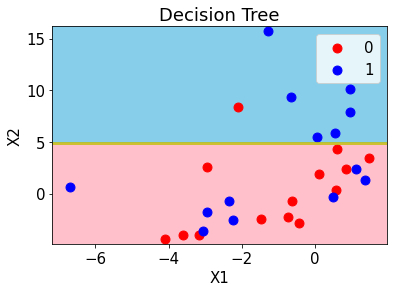

In [608]:
#可視化: 訓練データ
decision_region(X_train, y_train, tree_clf, title='Decision Tree', xlabel='X1', ylabel='X2', target_names=['0', '1'])


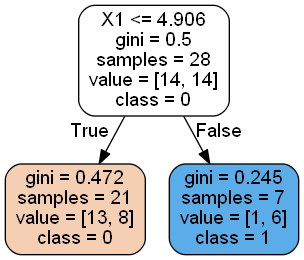

In [609]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(
                tree_clf, 
                class_names=["0", "1"],
                feature_names=['X0','X1'], 
                filled=True,
                rounded=True
            )

graph = pydotplus.graph_from_dot_data( dot_data )
graph.write_png( './tree.png' )
Image(graph.create_png())